In [96]:
"""
see: 
http://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data
http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm
http://r.789695.n4.nabble.com/Identifying-outliers-in-non-normally-distributed-data-td987921.html

There is a huge number of ways to test for outliers
A simple but good outlier test is to remove points based on their "median absolute deviation (MAD)".
"""

# !!! Attention !!!
# 1) We need the outlier classifier to work correctly regardless of sample - size 
# the MAD-based classifier works correctly regardless of sample-size, 
# 2) Identifying an observation as an outlier depends on the underlying distribution of the data. 
# here we limit the discussion to univariate data sets that are assumed to follow an approximately normal distribution.
# If the normality assumption for the data being tested is not valid, then a determination that there is an outlier may
# in fact be due to the non-normality of the data rather than the prescence of an outlier. 

    
    
# It is recommented that the modified Z-scores with an absolute value of greater than 3.5 be labeled as outliers

    
# imports 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [97]:
# Some outlier methods...

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return points[modified_z_score > thresh]

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return data[(data < minval) | (data > maxval)]

def tukey_based_outlier(data, m=1.5):
    #There doesn’t seem to be any statistically-driven reason Tukey uses 1.5 as a hard basis for his method. 
    #In fact, if we want to be more conservative, you could use 3 x IQR to identify the “extreme” outliers.”
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    low_lim = Q1 - m * IQR
    high_lim = Q3 + m * IQR
    return data[(data < low_lim) | (data > high_lim)]

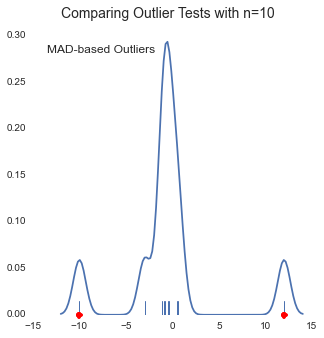

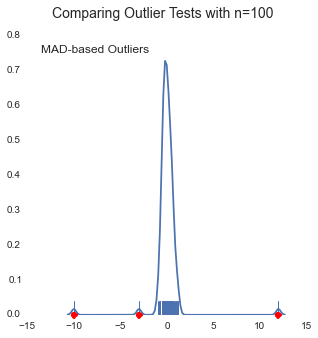

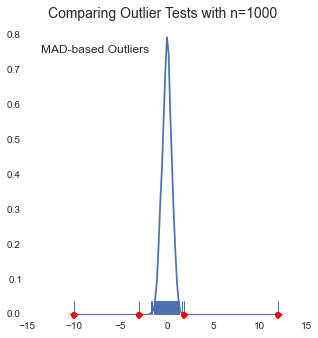

In [98]:


def find_outliers_and_plot(x):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 
    sns.distplot(x, ax=ax, rug=True, hist=False)
    outliers = mad_based_outlier(x)
    #outliers = tukey_based_outlier(x)
    #outliers = percentile_based_outlier(x)


    
    ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    ax.set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

    
def normal_and_outliers(n_events):
    # Generate some data
    x = np.random.normal(0, 0.5, n_events-3)
    # And add three outliers...
    x = np.r_[x, -3, -10, 12]
    return x    
    
    
def find_outliers():
    # we do the test for different size to check that this does not affect the result
    for n_events in [10, 100, 1000]:
        x = normal_and_outliers(n_events)
        find_outliers_and_plot(x)
    plt.show()
    
find_outliers()

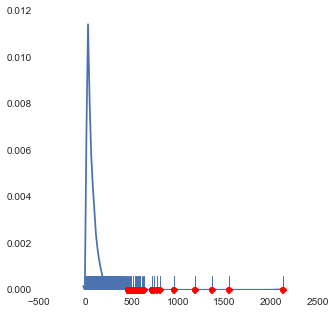

In [99]:
# But in many cases we do not have symmetrical and normal distributions, e.g. a landau with a big tail and outliers after that tail
# If we use the MAD version, we ll get just too many outliers in the tail - which do not seem to be 

# A good candidate is Tukey method because
# 1) it is simple, just leveraging the Interquartile Range
# 2) it is applicable to most ranges since it isn’t dependent on distributional assumptions
# 3) it ignores the mean and standard deviation, making it resistant to being influenced by the extreme values in the range

# !!! Attention !!!
# On this task there are written many books and many libraries (see robust lib of R)
# There is not any super robust algorith that automatically detects outliers for anything we feed!
# Even if we would assume normal distribution, declaring points as outliers is a bit of tricky/fraud
# This is because we need a good _theoretical_ reason for making the decision => Such judgement is imposible to codify in an algorithm



import pandas as pd
 

def plot_it(x):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 
    sns.distplot(x, ax=ax, rug=True, hist=False)
    #outliers = x[mad_based_outlier(x)]
    outliers = tukey_based_outlier(x, 6)
    ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    
 
# read real data distribution
df = pd.read_csv('small_data_samples/landau_approx_and_outliers.csv', header=None)
x = df[0].values
plot_it(x)
